In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
# task_name = "diabetes_regr" # satellite #openml_361236 #diabetes_classification
# # directory = f'./results/mdi_local.real_data_classification/{task_name}/varying_normalize'#varying_sample_row_n'
# directory = f'./results/mdi_local.real_data_regression/{task_name}/varying_sample_row_n'

# task_name = "Juvenile" # satellite #openml_361236 #diabetes_classification
# directory = f'./results/mdi_local.real_data_classification/{task_name}/varying_sample_row_n'#varying_normalize'
task_name = 'diabetes_test_new'
directory = f'./results/mdi_local.real_data_regression/{task_name}/varying_sample_row_n'
folder_names = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [3]:
# df = pd.read_csv("./results/mdi_local.real_data_regression/diabetes_regression/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/diabetes_classification/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_new_implementation/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_image/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/juvenile_new/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/ca_housing/varying_sample_row_n/seed331/results.csv")

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
combined_df

sample_row_n sample_row_n_name  rep  n_estimators  min_samples_leaf  \
0            NaN     keep_all_rows    0           100                 5   
1            NaN     keep_all_rows    0           100                 5   
2            NaN     keep_all_rows    0           100                 5   
3            NaN     keep_all_rows    0           100                 5   
4            NaN     keep_all_rows    0           100                 5   
5            NaN     keep_all_rows    0           100                 5   
6            NaN     keep_all_rows    0           100                 5   
7            NaN     keep_all_rows    0           100                 5   
8            NaN     keep_all_rows    0           100                 5   
9            NaN     keep_all_rows    0           100                 5   
10           NaN     keep_all_rows    0           100                 5   
11           NaN     keep_all_rows    0           100                 5   
12           NaN     keep_all_rows    0           100                 5   
13           NaN     keep_all_rows    0           100                 5   
14           NaN     keep_all_rows    0           100                 5   
15           NaN     keep_all_rows    0           100                 5   
16           NaN     keep_all_rows    0           100                 5   
17           NaN     keep_all_rows    0           100                 5   

    max_features  random_state model                                     fi  \
0           0.33            42    RF                    Kernel_SHAP_RF_plus   
1           0.33            42    RF                  LFI_fit_on_OOB_RFPlus   
2           0.33            42    RF  LFI_fit_on_all_evaluate_on_all_RFPlus   
3           0.33            42    RF  LFI_fit_on_all_evaluate_on_oob_RFPlus   
4           0.33            42    RF                LFI_fit_on_inbag_RFPlus   
5           0.33            42    RF                           LIME_RF_plus   
6           0.33            42    RF                     Oracle_test_RFPlus   
7           0.33            42    RF                                 Random   
8           0.33            42    RF                            TreeSHAP_RF   
9           0.33            42    RF                    Kernel_SHAP_RF_plus   
10          0.33            42    RF                  LFI_fit_on_OOB_RFPlus   
11          0.33            42    RF  LFI_fit_on_all_evaluate_on_all_RFPlus   
12          0.33            42    RF  LFI_fit_on_all_evaluate_on_oob_RFPlus   
13          0.33            42    RF                LFI_fit_on_inbag_RFPlus   
14          0.33            42    RF                           LIME_RF_plus   
15          0.33            42    RF                     Oracle_test_RFPlus   
16          0.33            42    RF                                 Random   
17          0.33            42    RF                            TreeSHAP_RF   

    train_size  train_subset_size  test_size  test_subset_size  num_features  \
0          296                100        146               100            10   
1          296                100        146               100            10   
2          296                100        146               100            10   
3          296                100        146               100            10   
4          296                100        146               100            10   
5          296                100        146               100            10   
6          296                100        146               100            10   
7          296                100        146               100            10   
8          296                100        146               100            10   
9          296                100        146               100            10   
10         296                100        146               100            10   
11         296                100        146               100            10   
12         296                100   

In [5]:
combined_df["train_size"].unique()

array([296])

In [6]:
combined_df["test_size"].unique()

array([146])

In [7]:
# Print the run-time of the feature importance algorithm
combined_df.groupby('fi')['fi_time'].mean().reset_index()

fi     fi_time
0                    Kernel_SHAP_RF_plus  185.293420
1                  LFI_fit_on_OOB_RFPlus    1.590940
2  LFI_fit_on_all_evaluate_on_all_RFPlus    1.382078
3  LFI_fit_on_all_evaluate_on_oob_RFPlus    1.627680
4                LFI_fit_on_inbag_RFPlus    1.572936
5                           LIME_RF_plus  205.688434
6                     Oracle_test_RFPlus    0.819713
7                                 Random    0.000220
8                            TreeSHAP_RF    0.235108

In [8]:
combined_df.groupby('fi')['train_subset_ablation_addition_time'].mean().reset_index()

fi  train_subset_ablation_addition_time
0                    Kernel_SHAP_RF_plus                             4.520890
1                  LFI_fit_on_OOB_RFPlus                             4.534234
2  LFI_fit_on_all_evaluate_on_all_RFPlus                             4.537719
3  LFI_fit_on_all_evaluate_on_oob_RFPlus                             4.610973
4                LFI_fit_on_inbag_RFPlus                             4.575389
5                           LIME_RF_plus                             0.000041
6                     Oracle_test_RFPlus                             0.000048
7                                 Random                             4.433890
8                            TreeSHAP_RF                             4.496890

In [9]:
combined_df.groupby('fi')['train_subset_ablation_removal_time'].mean().reset_index()

fi  train_subset_ablation_removal_time
0                    Kernel_SHAP_RF_plus                            4.456088
1                  LFI_fit_on_OOB_RFPlus                            4.489617
2  LFI_fit_on_all_evaluate_on_all_RFPlus                            4.456733
3  LFI_fit_on_all_evaluate_on_oob_RFPlus                            4.528973
4                LFI_fit_on_inbag_RFPlus                            4.463955
5                           LIME_RF_plus                            0.000048
6                     Oracle_test_RFPlus                            0.000043
7                                 Random                            4.412645
8                            TreeSHAP_RF                            4.431453

In [10]:
#################### Change the following according to the dataset ####################
task = "regression" #"regression" "classification"
########################################################################################
methods_all = combined_df['fi'].drop_duplicates().tolist()
n_testsize = combined_df[['train_size', 'test_size']].drop_duplicates()
num_features = combined_df['num_ablate_features'].drop_duplicates()[0]
metrics = {"regression": ["MSE", "R_2"], "classification": ["AUROC","AUPRC", "F1"]}
ablation_models = {"regression": ["RF_Regressor", "Linear", "XGB_Regressor", "RF_Plus_Regressor"], 
                   "classification": ["RF_Classifier","LogisticCV", "SVM", "XGBoost_Classifier", "RF_Plus_Classifier"]}

In [11]:
# if task == "classification":
#     grouped = combined_df.groupby("model")
#     for model, group_df in grouped:
#         print("Model:", model)
#         print("RF AUROC:", group_df["test_all_auc_rf"].mean())
#         print("RF AUPRC:", group_df["test_all_auprc_rf"].mean())
#         print("RF F1:", group_df["test_all_f1_rf"].mean())
#         print("RF_plus AUROC:", group_df["test_all_auc_rf_plus"].mean())
#         print("RF_plus AUPRC:", group_df["test_all_auprc_rf_plus"].mean())
#         print("RF_plus F1:", group_df["test_all_f1_rf_plus"].mean())
# elif task == "regression":
#     grouped = combined_df.groupby("model")
#     for model, group_df in grouped:
#         print("Model:", model)
#         print("RF MSE:", group_df["test_all_mse_rf"].mean())
#         print("RF R2:", group_df["test_all_r2_rf"].mean())
#         print("RF_plus MSE:", group_df["test_all_mse_rf_plus"].mean())
#         print("RF_plus R2:", group_df["test_all_r2_rf_plus"].mean())

# Training Data

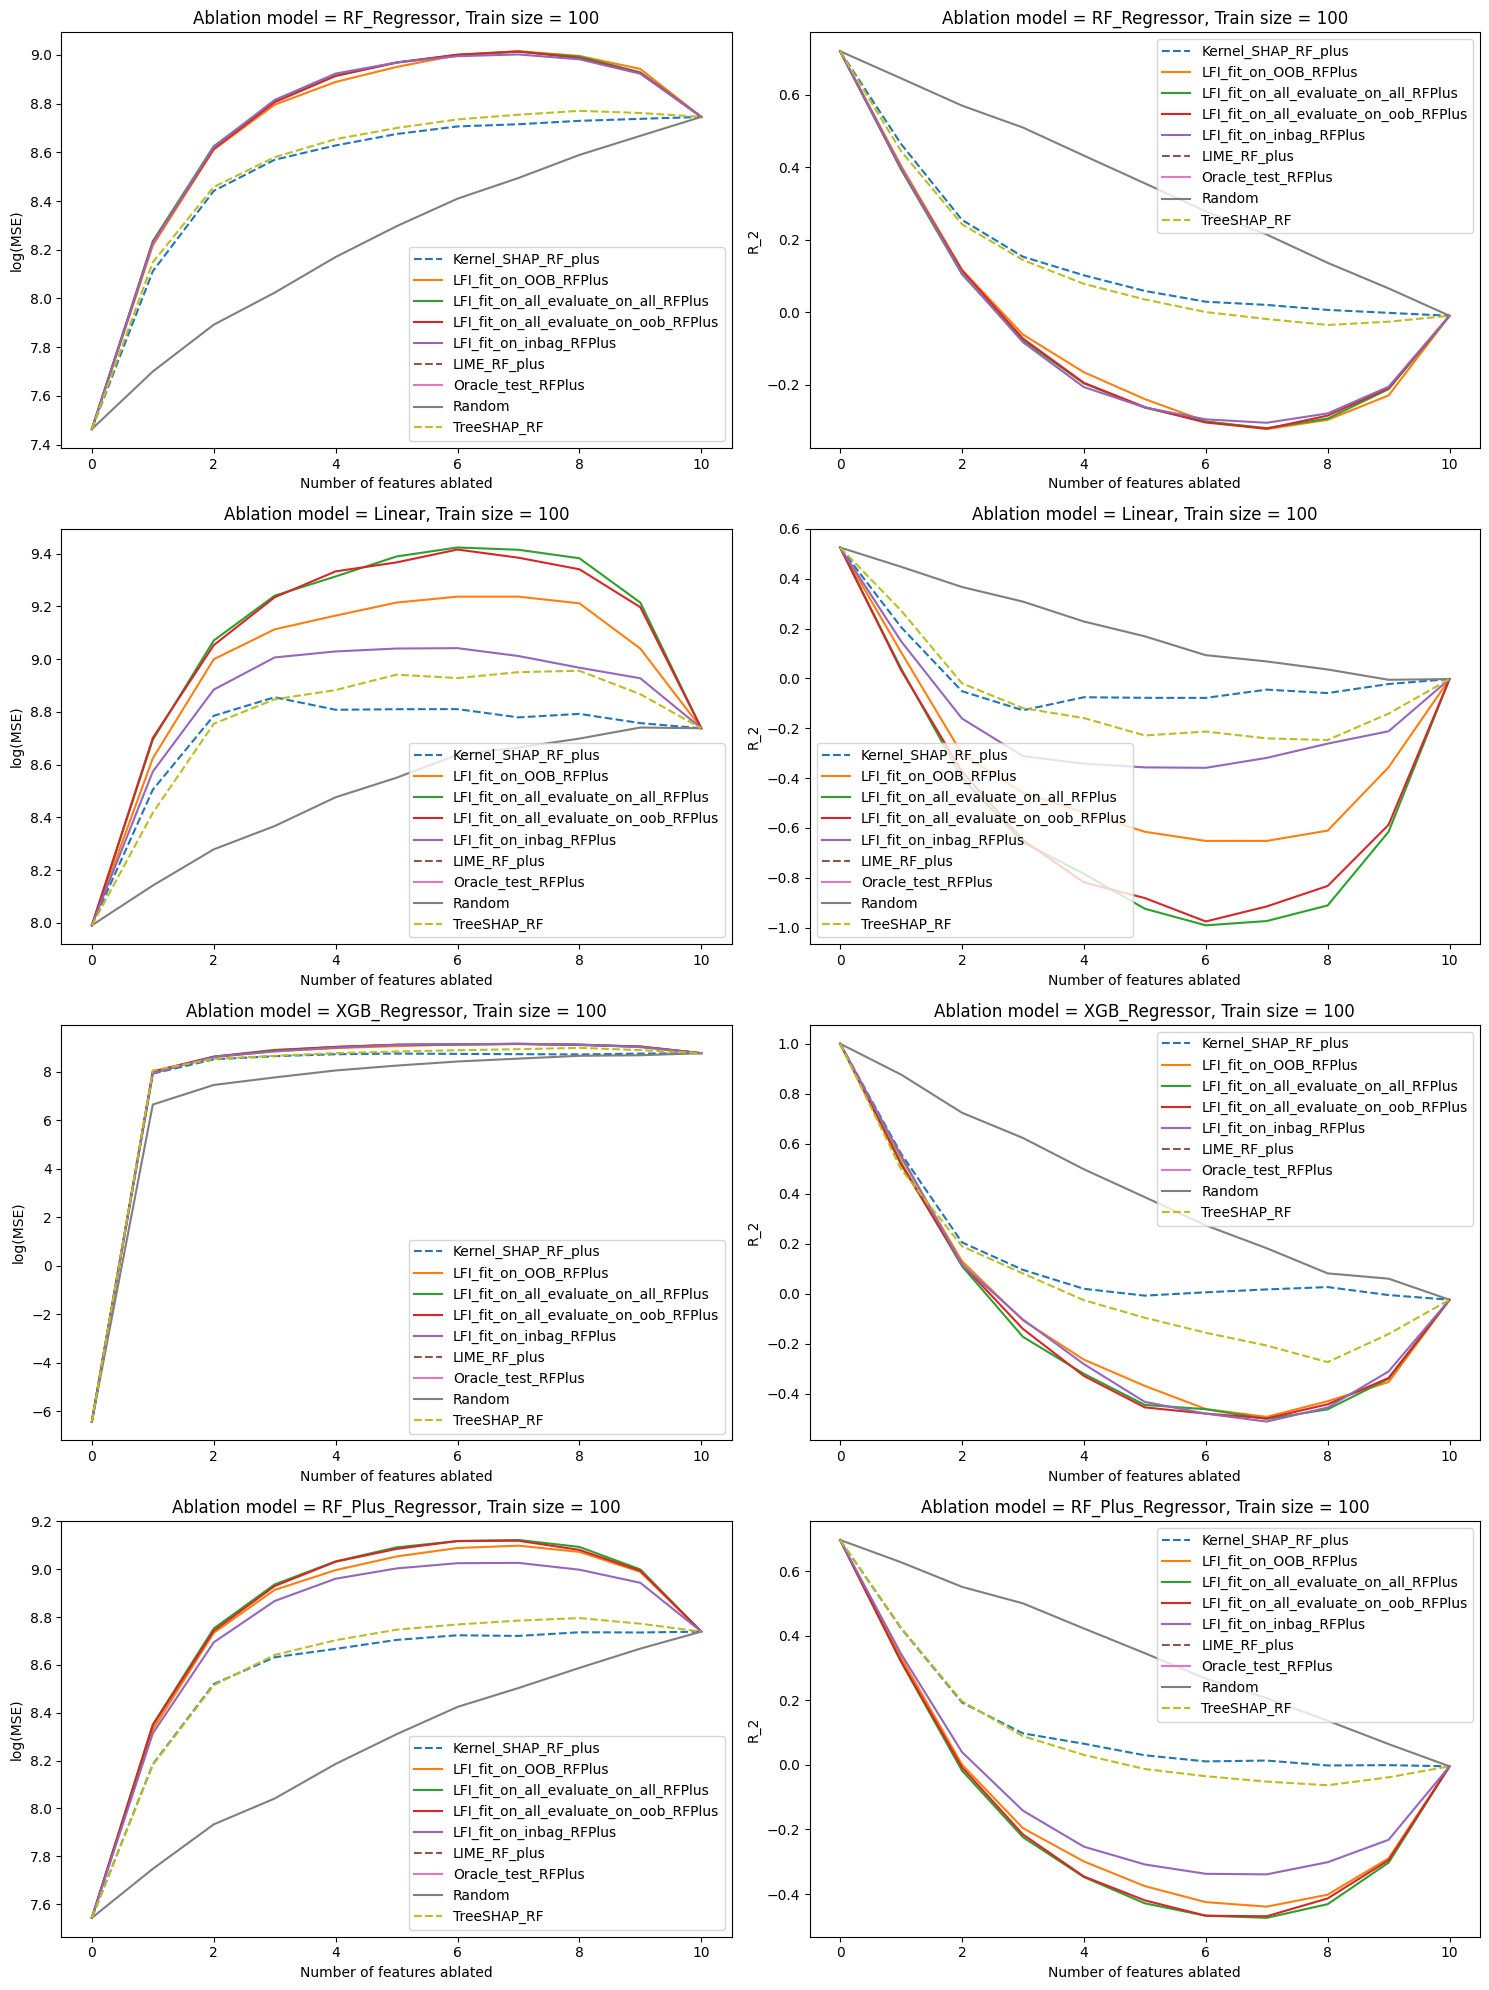

In [12]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_train.png")
plt.show()

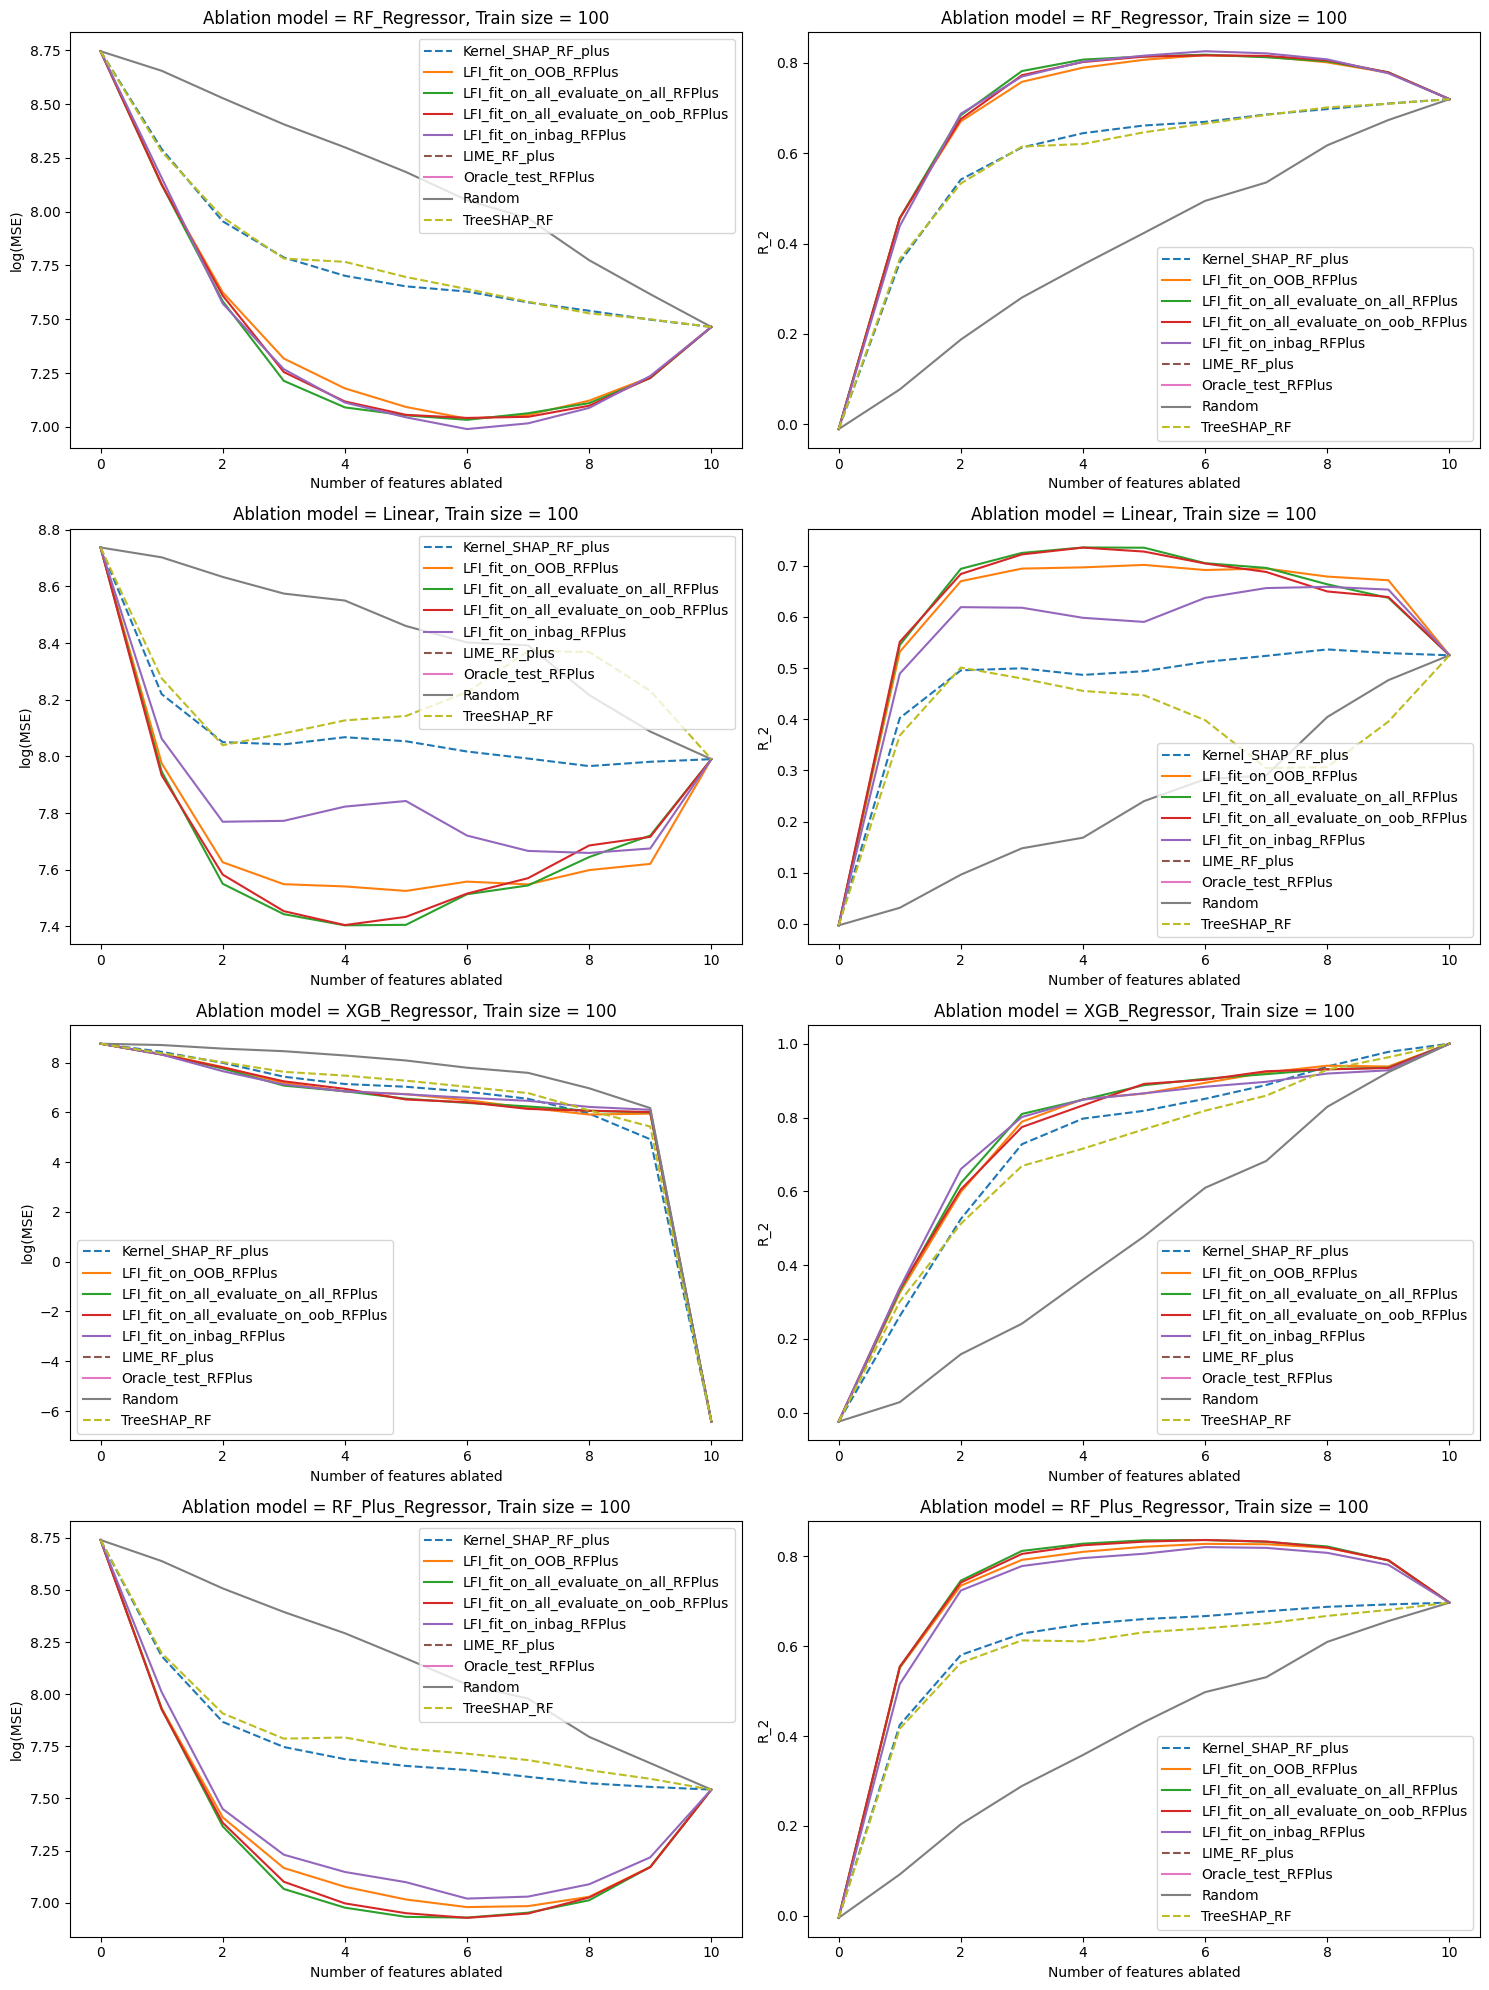

In [13]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_train.png")
plt.show()

# Test data(subset)

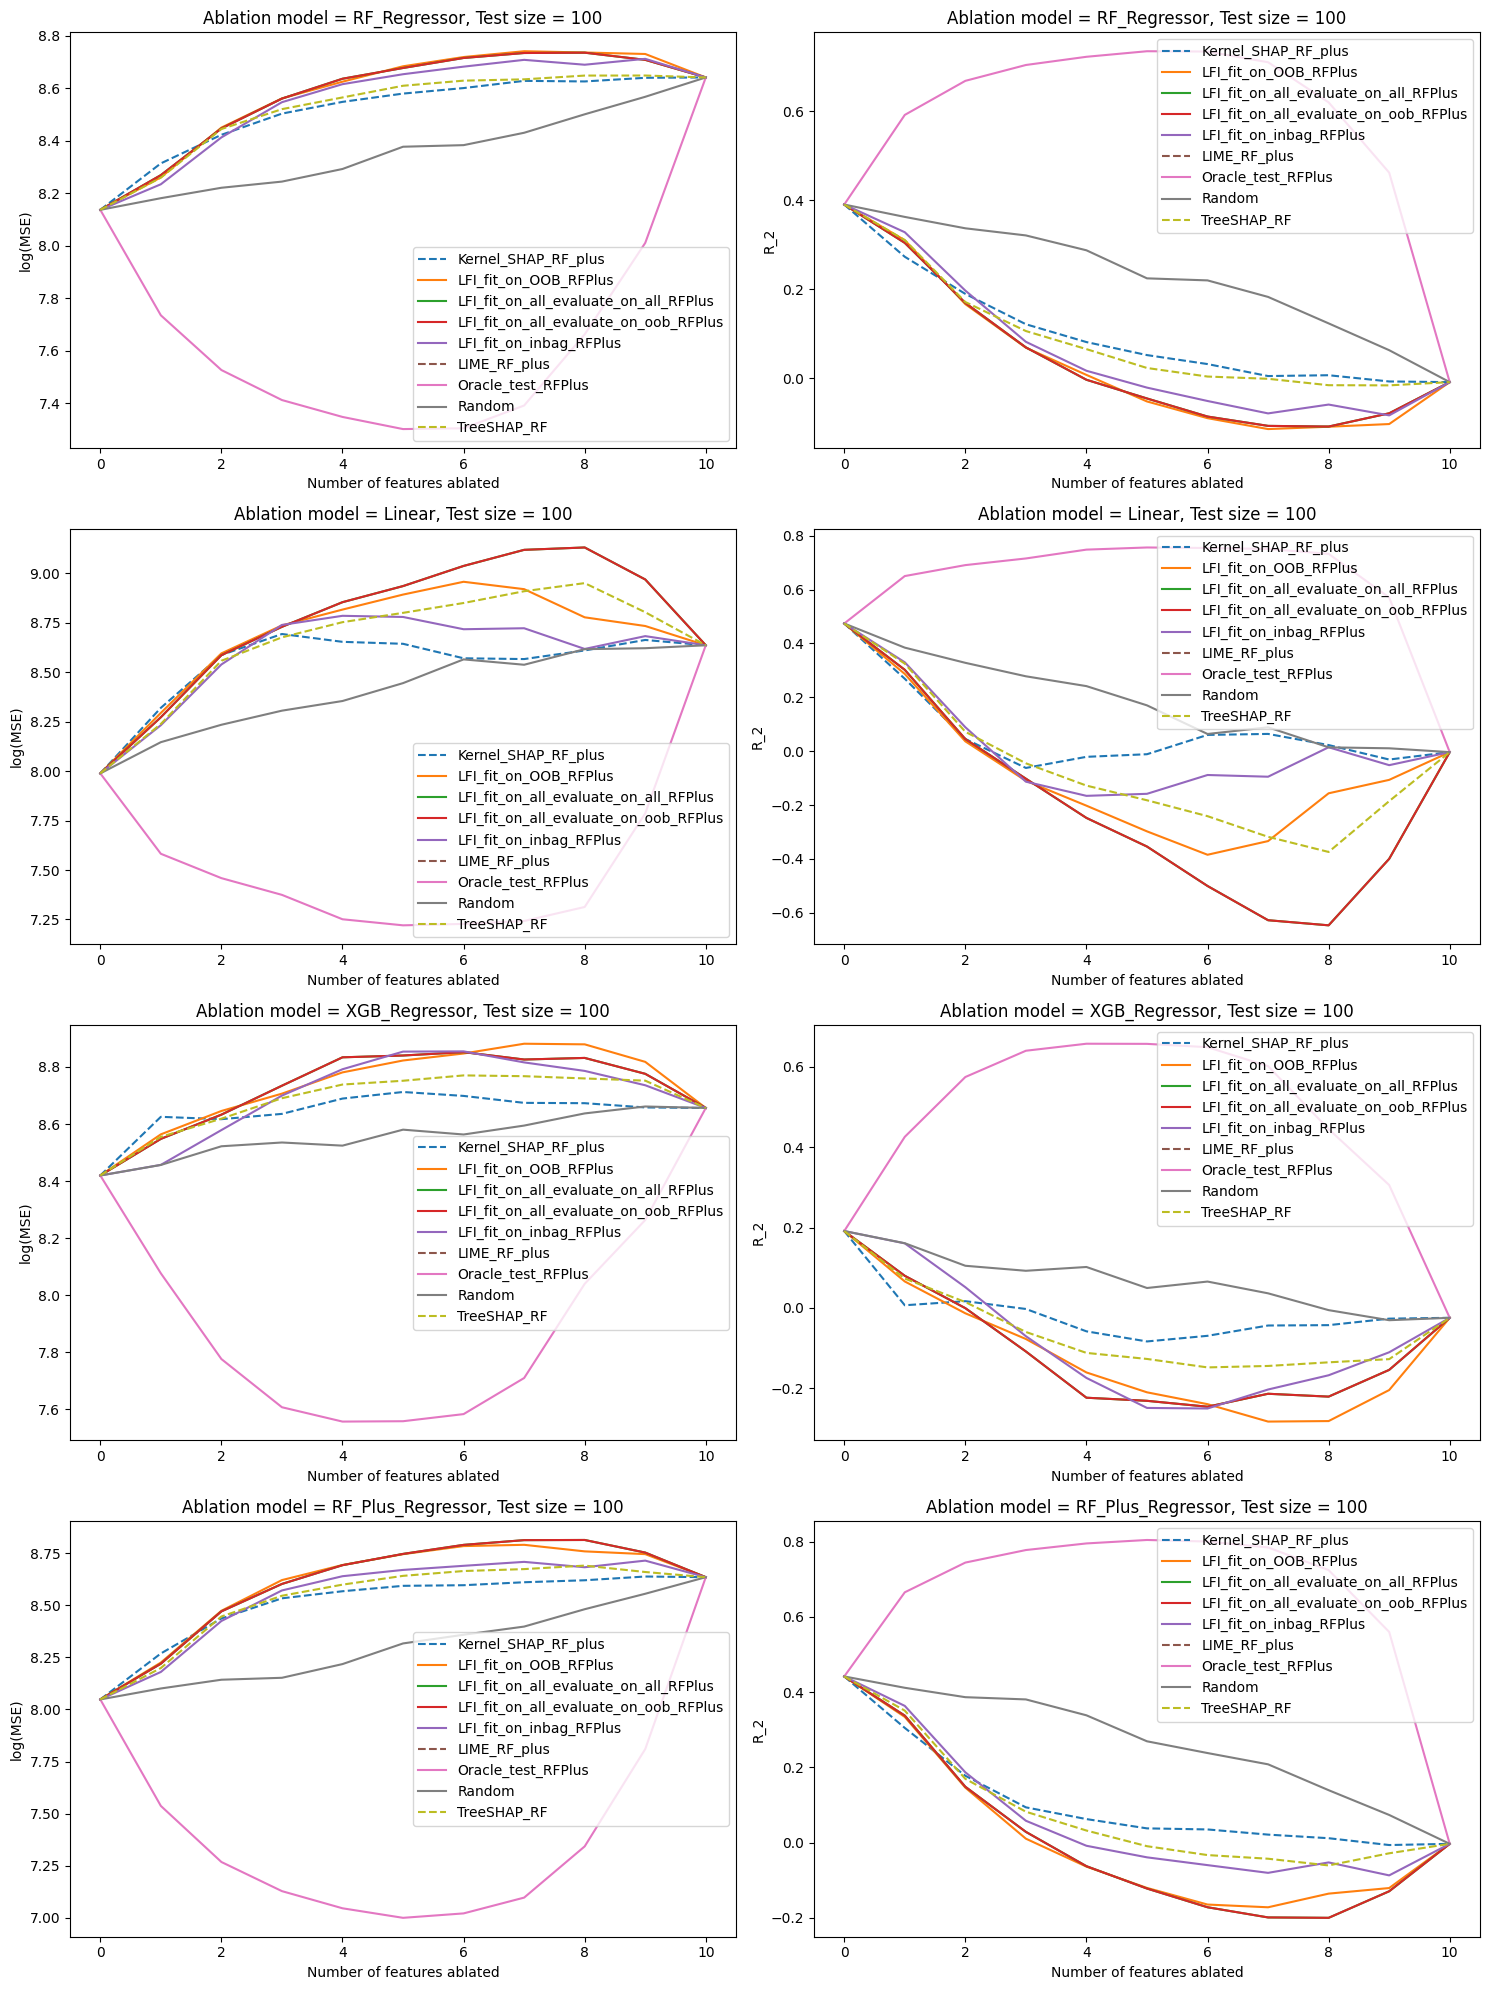

In [14]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        ax.legend()

plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_test_subset_1.png")
plt.show()

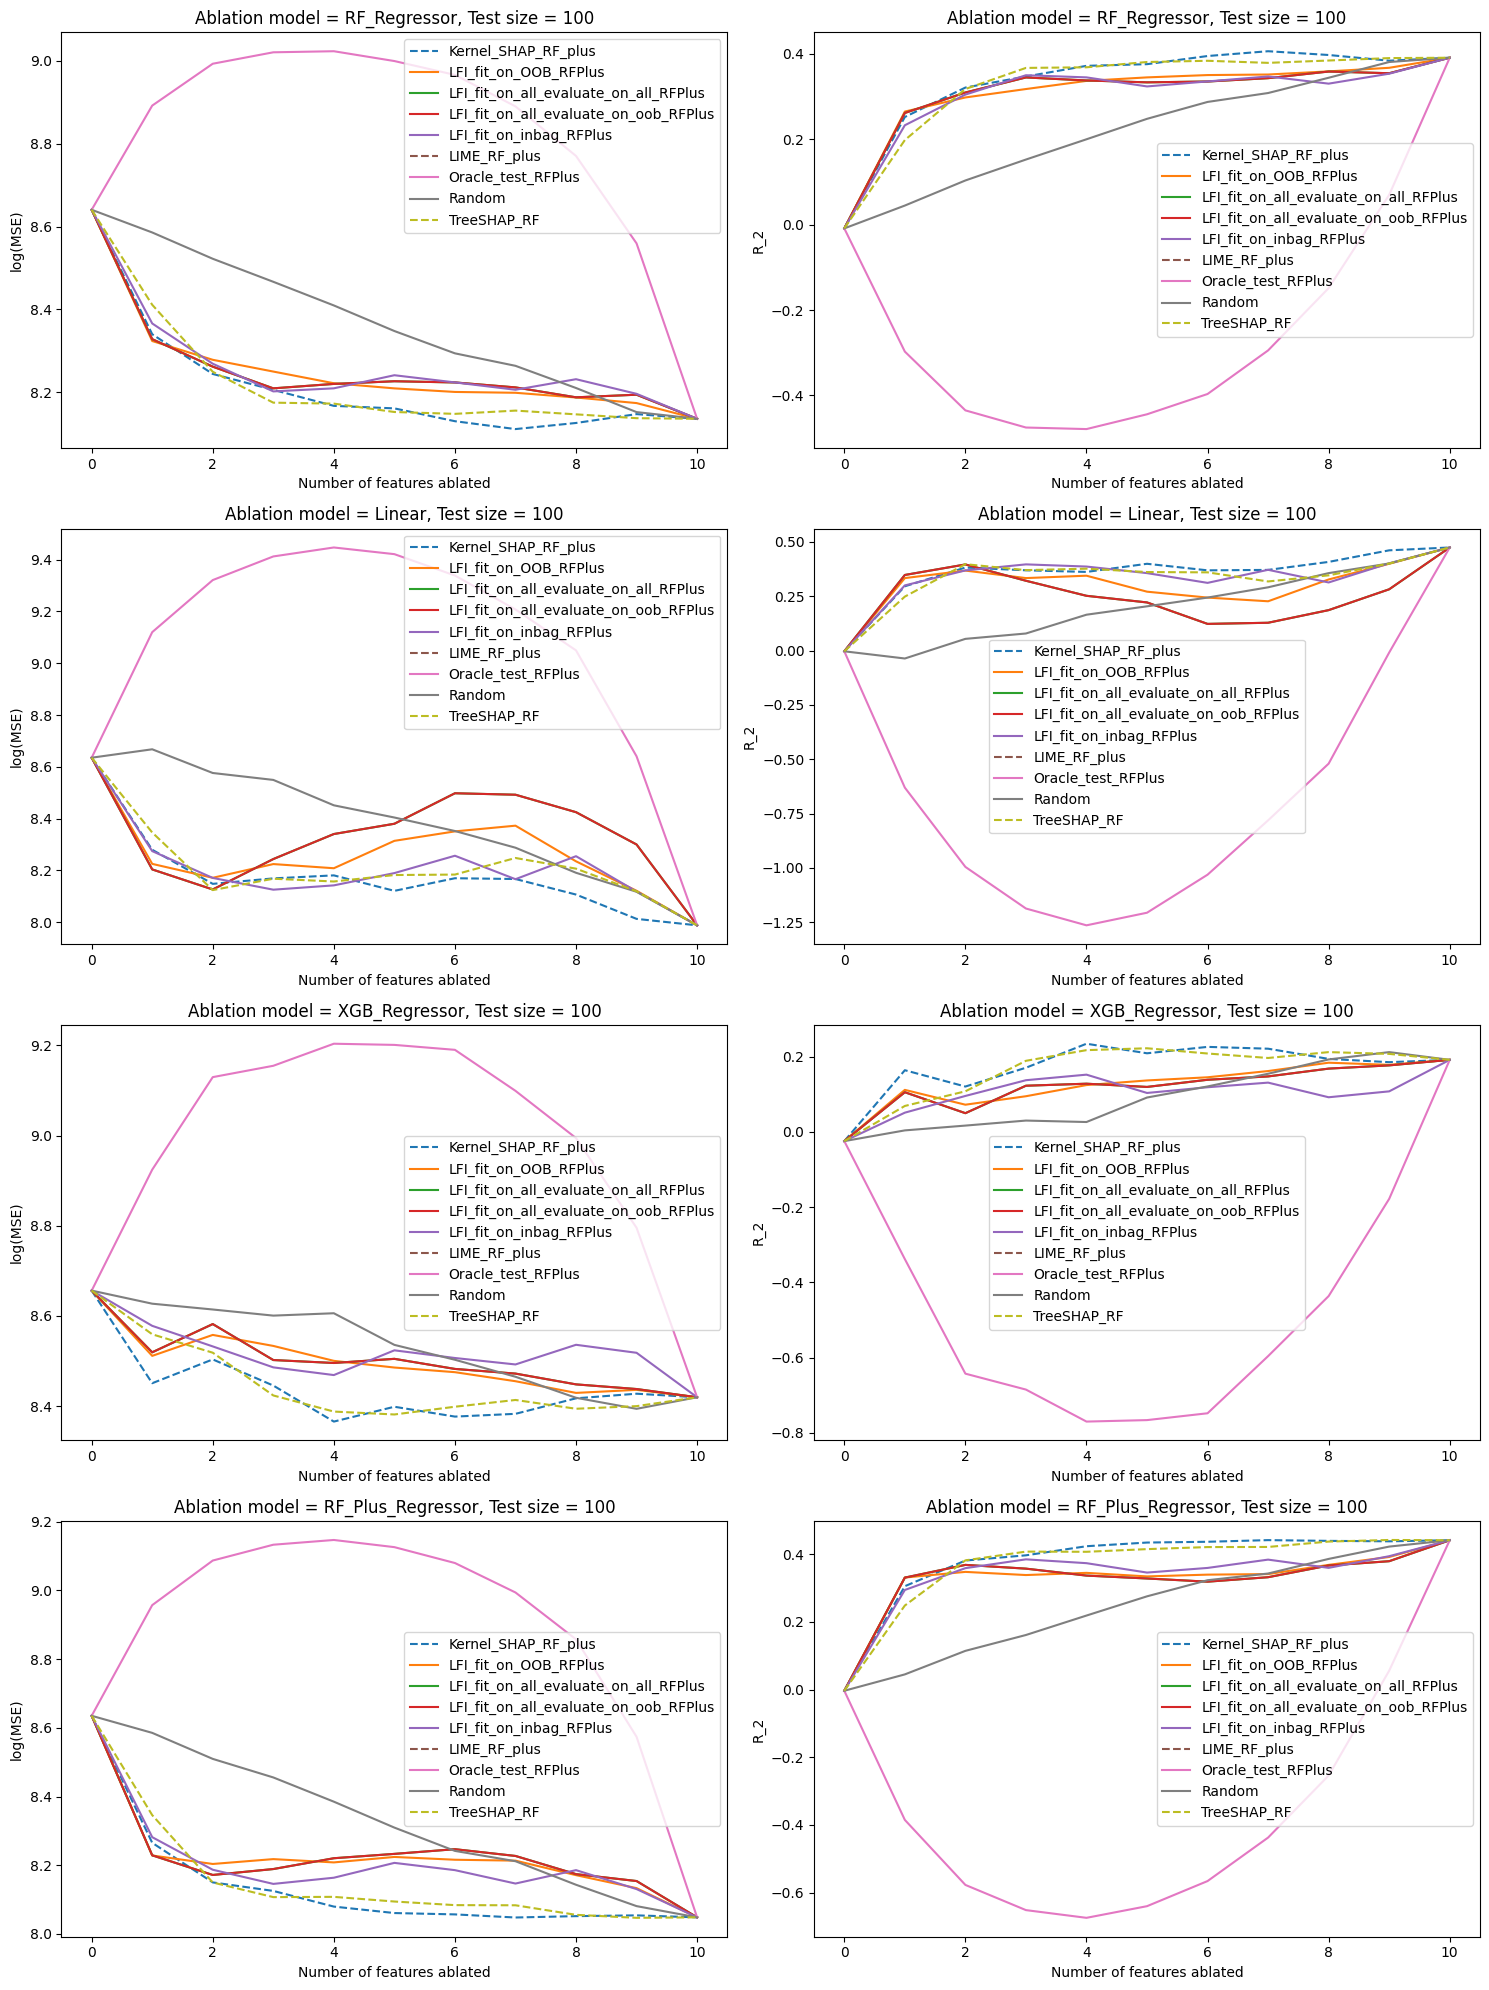

In [15]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m in ["TreeSHAP_RF","Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        ax.legend()
plt.tight_layout()
# plt.savefig(f"./{task_name}_{task}_test_subset_2.png")
plt.show()

# Test data

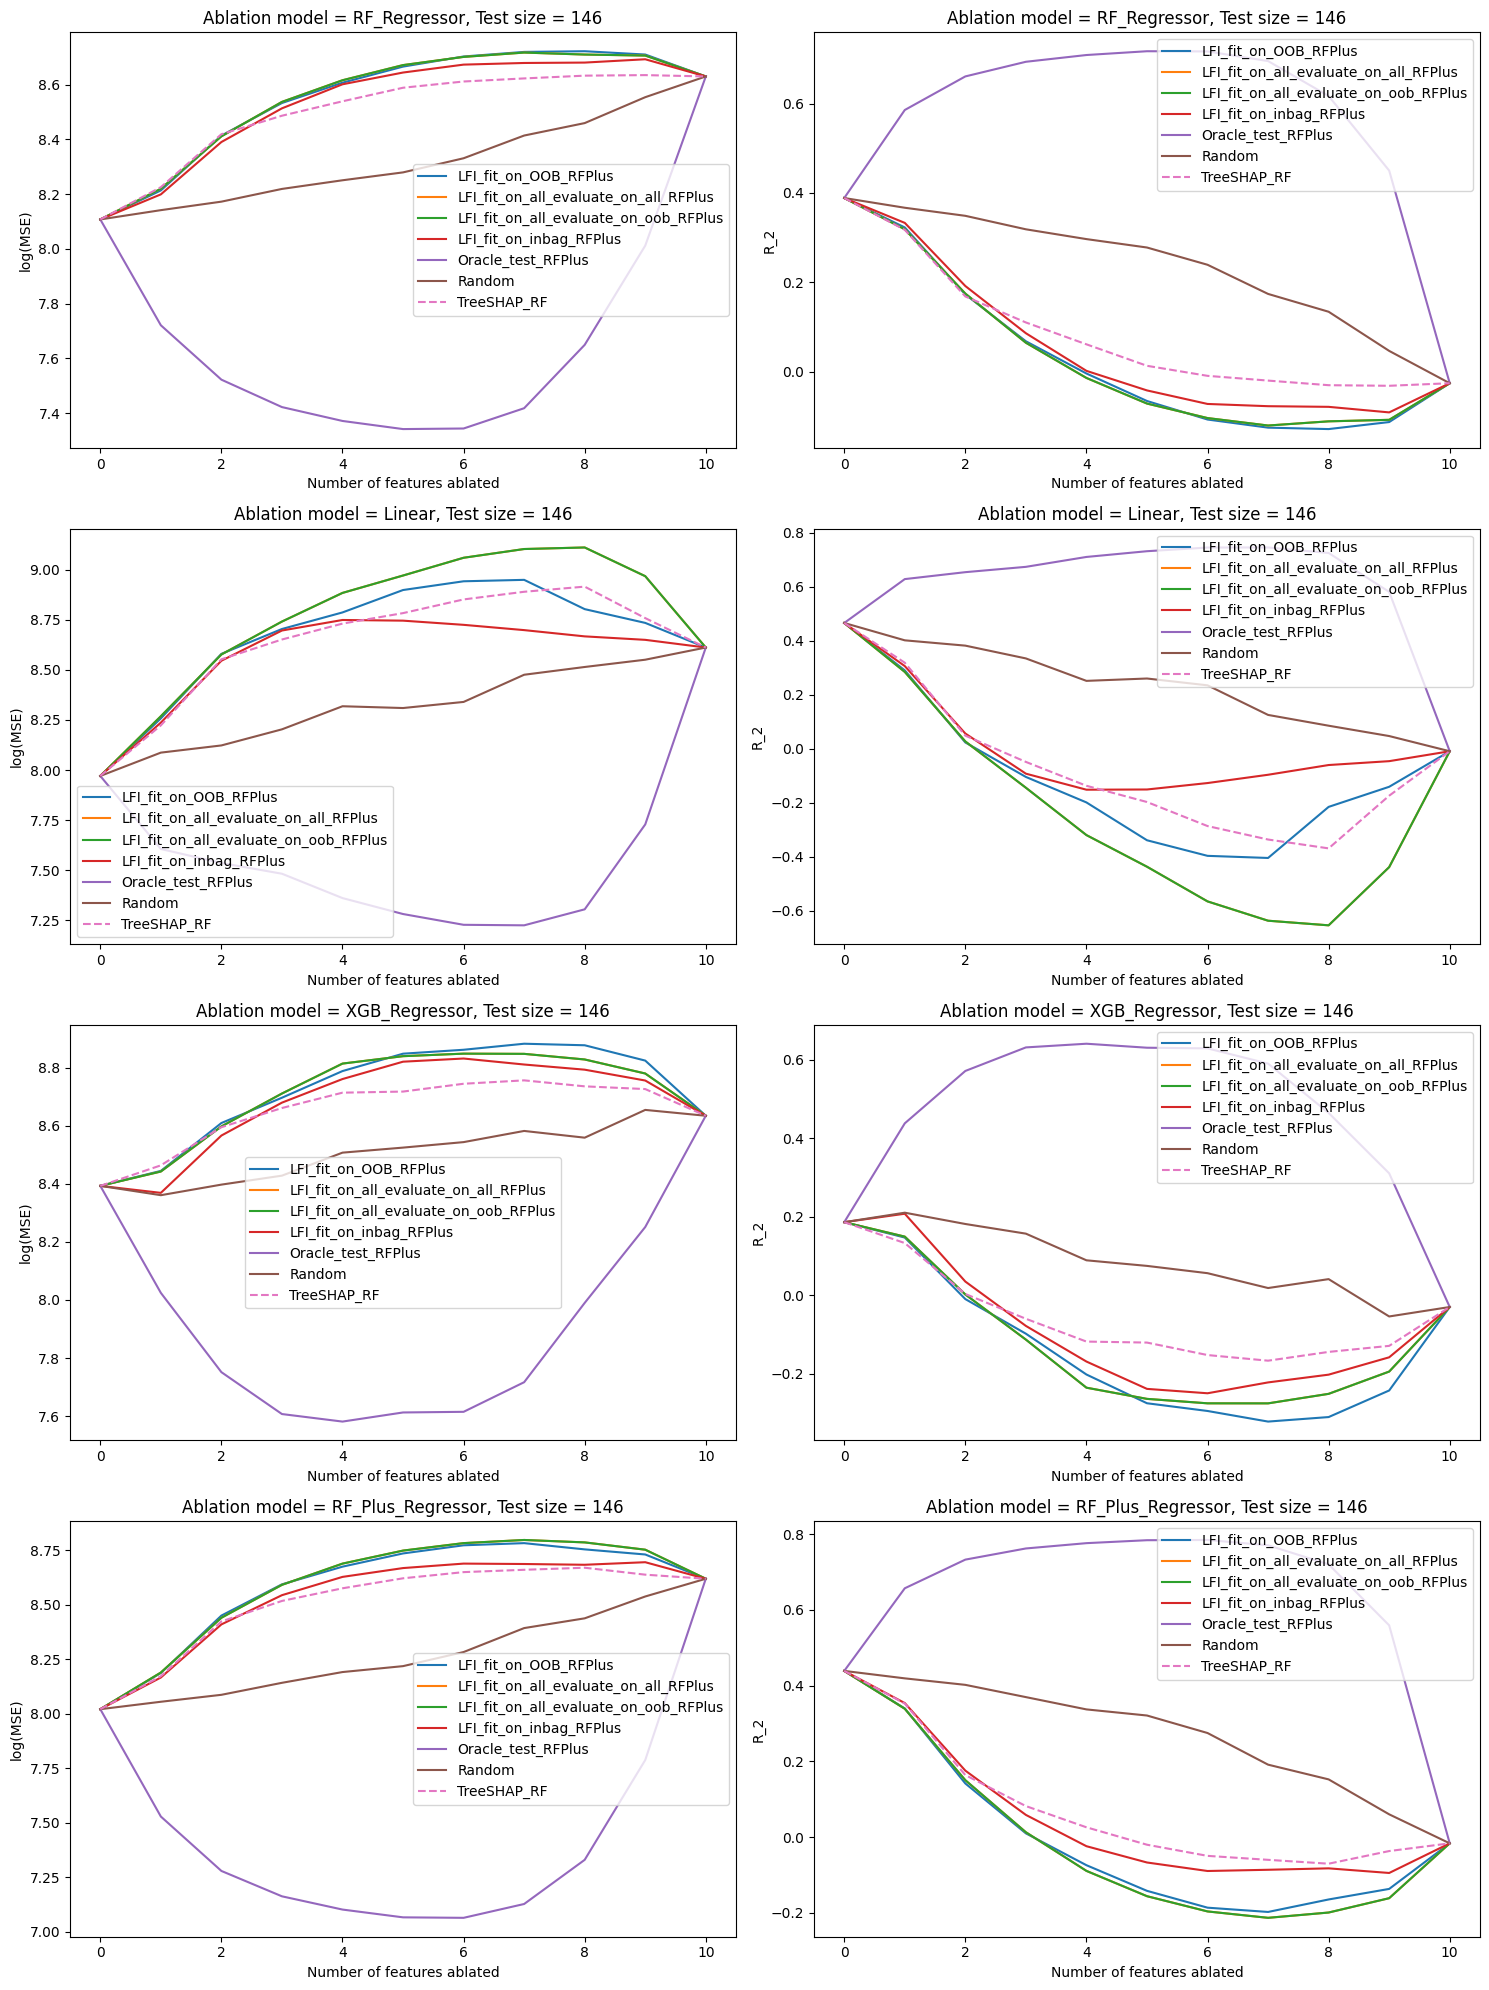

In [16]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_all:
            results[m] = []
        for m in methods_all:
            if metric == "MSE":
                results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(np.log(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_all:
            if m not in ["Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                if m in ["TreeSHAP_RF","Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
                    ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
                else:
                    ax.plot(range(num_features+1), results[m], label=m)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"log({metric})",
                title=f'Ablation model = {a_model}, Test size = {n_testsize["test_size"].values[0]}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {n_testsize["test_size"].values[0]}')
        ax.legend()
plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test.png")
plt.show()